### 1) Supress warning

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 2) Importing the libraries

In [2]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

### 3) Importing the application_data csv file

In [3]:
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

### 4) Inspection---check the structure of the data

In [4]:
print(application_data.shape)
print(application_data.columns)
print(application_data.info())

(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


### 5) Data Quality Check and Missing value

### --- Percentage of missing values for all the columns in application_data

In [5]:
#Null values, percentage and data type
def missing_values_table(application_data):     
    # Sum of null values
    mis_val = application_data.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * application_data.isnull().sum() / len(application_data)
    
    # Data type of objects
    data_type = application_data.dtypes
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent,data_type], axis=1)   
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'Data_Type'})
    return mis_val_table_ren_columns
print(missing_values_table(application_data))

                            Missing Values  % of Total Values Data_Type
SK_ID_CURR                               0           0.000000     int64
TARGET                                   0           0.000000     int64
NAME_CONTRACT_TYPE                       0           0.000000    object
CODE_GENDER                              0           0.000000    object
FLAG_OWN_CAR                             0           0.000000    object
...                                    ...                ...       ...
AMT_REQ_CREDIT_BUREAU_DAY            41519          13.501631   float64
AMT_REQ_CREDIT_BUREAU_WEEK           41519          13.501631   float64
AMT_REQ_CREDIT_BUREAU_MON            41519          13.501631   float64
AMT_REQ_CREDIT_BUREAU_QRT            41519          13.501631   float64
AMT_REQ_CREDIT_BUREAU_YEAR           41519          13.501631   float64

[122 rows x 3 columns]


### --- Remove columns with missing percentage>45%

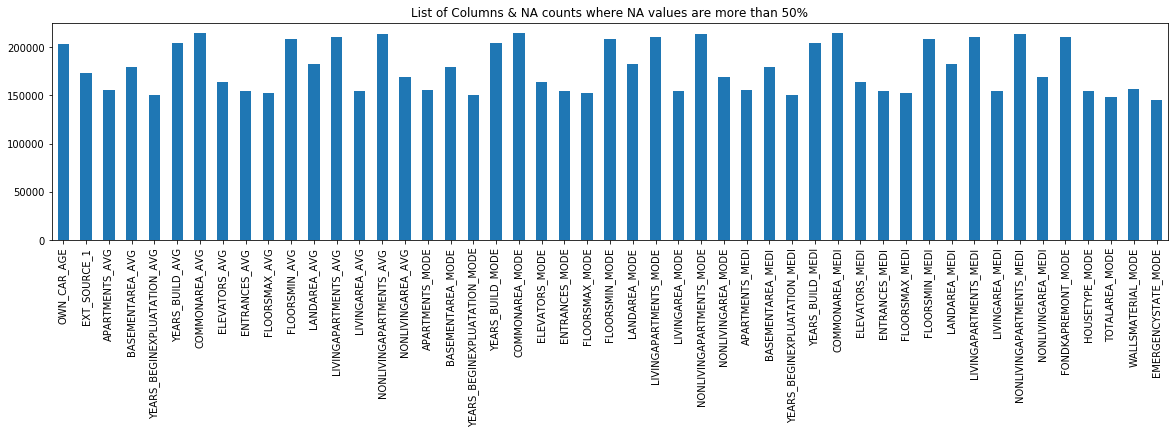

In [6]:
# for calculating with columns with high missing percentage (greater than and equal to 45 percent).
NA_col = application_data.isnull().sum()
NA_col = NA_col[NA_col.values >(0.45*len(application_data))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

In [7]:
# for removing the columns with high missing percentage (greater than and equal to 45 percent).
colnames = (application_data.isnull().sum()/len(application_data))
colnames = list(colnames[colnames.values>=0.45].index)
application_data.drop(labels = colnames,axis =1,inplace=True)        
print("Number of Columns dropped\t: ",len(colnames))
print(colnames)

Number of Columns dropped	:  49
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATE

### --- Check for the columns from application_data_1 whose missing values are <= 15%

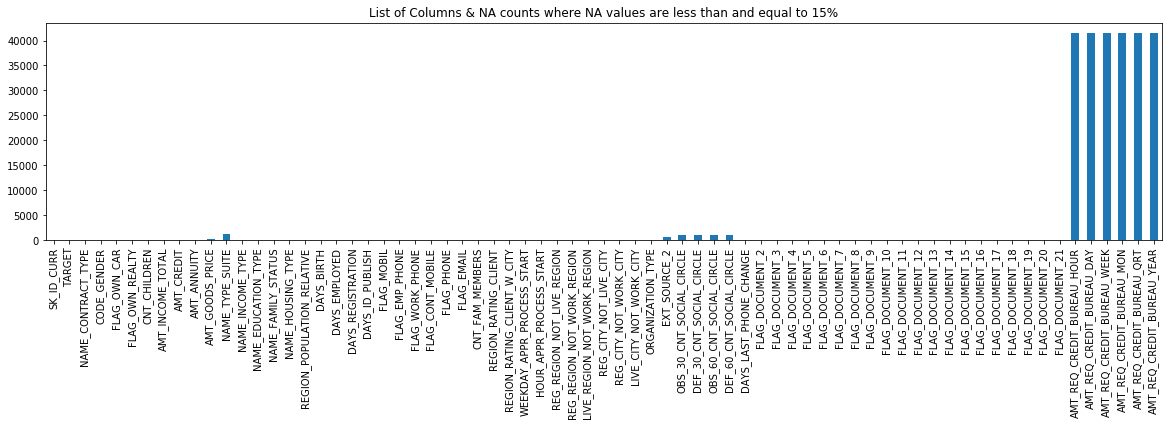

In [8]:
# for calculating with columns with missing less than and equal to 15 percentage.
NA_col = application_data.isnull().sum()
NA_col = NA_col[NA_col.values <=(0.15*len(application_data))]

plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are less than and equal to 15%')
plt.show()

In [9]:
# * 5 columns which have missing value around or less than 13% :

### -AMT_GOODS_PRICE(0.09%)-------------------numerical datatype(float64)
### -NAME_TYPE_SUITE(0.42%)-------------------object/Categorical
### -OBS_60_CNT_SOCIAL_CIRCLE(0.33%)----------numerical datatype(float64)
### -AMT_REQ_CREDIT_BUREAU_YEAR(13.5%)--------numerical datatype(float64)
### -AMT_REQ_CREDIT_BUREAU_QRT(13.5%)---------numerical datatype(float64)

### * NAME_TYPE_SUITE column is a categorical datatype column.There are in total 7 different values in it. So, we can use MODE imputation to handle the missing value.
### * for numerical columns we need to check if these have outliers
### * if outliers----median imputation
### * if no outliers----mean imputation

In [10]:
### Now, we need to check for the outliers for all 4 numerical columns and 1 categorical column

#1)AMT_ANNUITY-----numerical column 

#Identify if the oulier value present in AMT_ANNUITY col.

application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

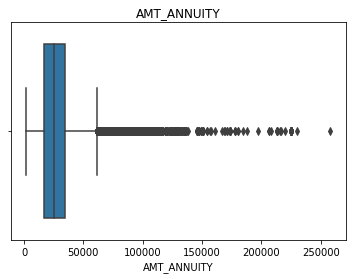

In [11]:
# Box plot to identify the oulier value present in AMT_ANNUITY col.
sns.boxplot(application_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

In [12]:
# 2)AMT_GOODS_PRICE-----numerical column 

# Identify if the oulier value present in AMT_GOODS_PRICE col.
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

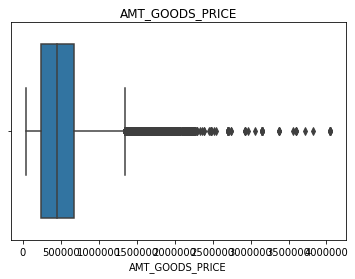

In [13]:
# Box plot to identify the oulier value present in AMT_GOODS_PRICE col.
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

In [14]:
##ignore this need to remove
##mean_value=df1['AMT_GOODS_PRICE'].mean()
##application_data['AMT_GOODS_PRICE']=application_data['AMT_GOODS_PRICE'].fillna(mean_value)
##application_data['AMT_GOODS_PRICE'].value_counts()

In [15]:
# 3) EXT_SOURCE_2

# Identify if the oulier value present in EXT_SOURCE_2 col
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

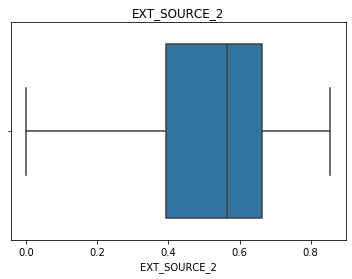

In [16]:
# Box plot to identify the oulier value present in EXT_SOURCE_2 col
sns.boxplot(application_data['EXT_SOURCE_2'])
plt.title('EXT_SOURCE_2')
plt.show()

In [17]:
##ignore this need to remove
##mean_value=df1['EXT_SOURCE_2'].median()
##application_data['EXT_SOURCE_2']=application_data['EXT_SOURCE_2'].fillna(median_value)
##application_data['EXT_SOURCE_2'].value_counts()

In [18]:
# 4) NAME_TYPE_SUITE

# Identify if the oulier value present in NAME_TYPE_SUITE col
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

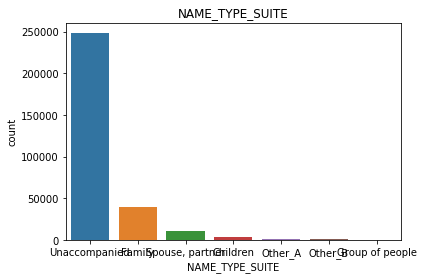

In [19]:
# Countplot to identify the oulier value present in NAME_TYPE_SUITE col
sns.countplot(application_data.NAME_TYPE_SUITE)  
plt.title('NAME_TYPE_SUITE')
plt.show()

In [20]:
##ignore this need to remove
#application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)
#application_data['NAME_TYPE_SUITE'].value_counts()

In [21]:
# 5) OBS_60_CNT_SOCIAL_CIRCLE

# Identify if the oulier value present in OBS_60_CNT_SOCIAL_CIRCLE col

application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

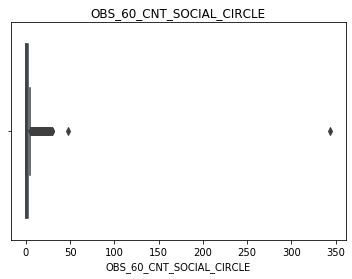

In [22]:
sns.boxplot(application_data['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.title('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()

In [23]:
##ignore this need to remove
##median_value=application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
##application_data['OBS_60_CNT_SOCIAL_CIRCLE']=application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(median_value)
##application_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

In [24]:
### * All these 4 numerical columns have outliers, so we can go with median imputation.

In [25]:
### * For NAME_TYPE_SUITE we need go with MODE imputation as it is categorical column.

### ---Finding MODE and median of given 5 columns:

In [28]:
print(application_data.NAME_TYPE_SUITE.describe())
print('\nAMT_GOODS_PRICE median:', application_data.AMT_GOODS_PRICE.median())
print('OBS_60_CNT_SOCIAL_CIRCLE median:', application_data.OBS_60_CNT_SOCIAL_CIRCLE.median())
print('AMT_REQ_CREDIT_BUREAU_YEAR median:', application_data.AMT_REQ_CREDIT_BUREAU_YEAR.median())
print('AMT_REQ_CREDIT_BUREAU_QRT median:', application_data.AMT_REQ_CREDIT_BUREAU_QRT.median())

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

AMT_GOODS_PRICE median: 450000.0
OBS_60_CNT_SOCIAL_CIRCLE median: 0.0
AMT_REQ_CREDIT_BUREAU_YEAR median: 1.0
AMT_REQ_CREDIT_BUREAU_QRT median: 0.0


#### -AMT_GOODS_PRICE(0.09%)-----------------impute with 450000.0
#### -NAME_TYPE_SUITE(0.42%)-----------------imputute with "Unaccompained"
#### -OBS_60_CNT_SOCIAL_CIRCLE(0.33%)--------impute with 0.0
#### -AMT_REQ_CREDIT_BUREAU_YEAR(13.5%)------impute with 1.0
#### -AMT_REQ_CREDIT_BUREAU_QRT(13.5%)-------impute with 0.0

### --- Now, we can take subset of few(say, 25 to 35) variables which makes sense to do the further analysis

In [29]:
subset = application_data.loc[:,['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'OBS_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
subset.head()
##subset.shape

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,0,0,Laborers,1.0,2,-1134.0,1,2.0,Business Entity Type 3,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,0,0,Core staff,2.0,1,-828.0,1,1.0,School,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,0,0,Laborers,1.0,2,-815.0,0,0.0,Government,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,0,0,0,Laborers,2.0,2,-617.0,1,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,0,1,1,Core staff,1.0,2,-1106.0,0,0.0,Religion,0.0,0.0,0.0,0.0


### --- Check the datatypes of all the columns and change the datatype if required

In [30]:
# check
print(subset.dtypes)

# check for the categorical columns
print('\n', subset.nunique().sort_values())

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
FLAG_PHONE                       int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
DAYS_LAST_PHONE_CHANGE   

In [31]:
# change the datatypes

subset[['TARGET', 'FLAG_PHONE', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3']] = subset[['TARGET', 'FLAG_PHONE', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3']].astype('bool')

subset[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']] = subset[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']].astype('category')

print('\n',subset.dtypes)


 SK_ID_CURR                        int64
TARGET                             bool
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
FLAG_PHONE                         bool
REG_CITY_NOT_WORK_CITY             bool
LIVE_CITY_NOT_WORK_CITY            bool
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT_W_CITY    categor

### Standardizing the values of DAYS_LAST_PHONE_CHANGE, DAYS_EMPLOYED, DAYS_BIRTH

In [32]:
## changing the negative 'DAYS_BIRTH' values to postive
subset['DAYS_BIRTH'].apply(abs)

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [33]:
## changing the negative 'DAYS_EMPLOYED' values to postive
subset['DAYS_EMPLOYED'].apply(abs)

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

## Indentifying,reporting and treating outliers

In [34]:
### For numerical columns check for outliers and report and analyze them

In [35]:
##for checking the outliers cols
perc =[.25, .75] 
  
# list of dtypes to include 
include =['float'] 
  
# calling describe method 
desc = subset.describe(percentiles = perc, include = include) 
desc

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307509.000000,307510.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,2.152665,-962.858788,1.405292,0.034362,0.267395,0.265474,1.899974
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,0.910682,826.808487,2.379803,0.204685,0.916002,0.794056,1.869295
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,2.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,2.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,3.000000,-274.000000,2.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,20.000000,0.000000,344.000000,8.000000,27.000000,261.000000,25.000000


In [36]:
##for checking exact numerical and floating values present in cols
subset.describe(include=[np.number])

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307509.000000,307510.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,2.152665,-962.858788,1.405292,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,0.910682,826.808487,2.379803,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,1.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,2.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,2.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,3.000000,-274.000000,2.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,20.000000,0.000000,344.000000,8.000000,27.000000,261.000000,25.000000


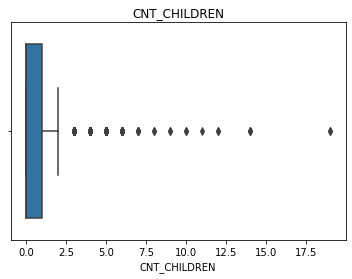

In [37]:
##Boxplot to show outliers

# 1)CNT_CHILDREN

sns.boxplot(subset['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()

In [38]:
##Treating outliers using IQR method
Q1 = subset['CNT_CHILDREN'].quantile(0.25)
Q3 = subset['CNT_CHILDREN'].quantile(0.75)
IQR= Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker=Q1-1.5*IQR
Upper_Whisker=Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
1.0
1.0
-1.5 2.5


In [39]:
##Removing the outliers for col
subset = subset[subset['CNT_CHILDREN']< Upper_Whisker]
subset['CNT_CHILDREN']

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 303239, dtype: int64

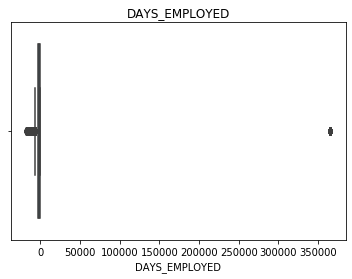

In [40]:
##Boxplot to show outliers

# 2)DAYS_EMPLOYED

sns.boxplot(subset['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')
plt.show()

In [41]:
##Treating outliers using IQR method
Q1 = subset['DAYS_EMPLOYED'].quantile(0.25)
Q3 = subset['DAYS_EMPLOYED'].quantile(0.75)
IQR= Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker=Q1-1.5*IQR
Upper_Whisker=Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-2754.0
-282.0
2472.0
-6462.0 3426.0


In [42]:
##Removing the outliers for col
subset = subset[subset['DAYS_EMPLOYED']< Upper_Whisker]
subset['DAYS_EMPLOYED']

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307504   -7258
307506    -236
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 247974, dtype: int64

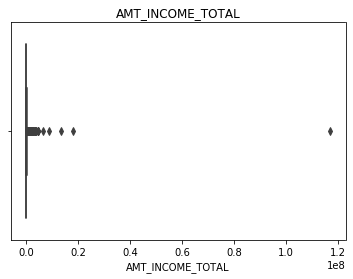

In [43]:
##Boxplot to show outliers

# 3)AMT_INCOME_TOTAL 

sns.boxplot(subset['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()

In [44]:
##Treating outliers using IQR method
Q1 = subset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = subset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR= Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker=Q1-1.5*IQR
Upper_Whisker=Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

112500.0
211500.0
99000.0
-36000.0 360000.0


In [45]:
##Removing the outliers for col
subset = subset[subset['AMT_INCOME_TOTAL']< Upper_Whisker]
subset['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307504    153000.0
307506    157500.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 235667, dtype: float64

### --- Binning of any 1 continuous variables.------ AMT_INCOME_TOTAL

In [46]:
# inspection

pd.set_option('display.precision',50)
subset.AMT_INCOME_TOTAL.describe()

count    235667.00000000000000000000000000000000000
mean     160116.40441557369194924831390380859375000
std       63913.78520933483378030359745025634765625
min       25650.00000000000000000000000000000000000
25%      112500.00000000000000000000000000000000000
50%      157500.00000000000000000000000000000000000
75%      202500.00000000000000000000000000000000000
max      359100.00000000000000000000000000000000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [47]:
# Bining/Bucketing of AMT_INCOME_TOTAL

income_range = [25000, 100000, 200000, 500000, 117000000]

slot = ['Low_Income', 'Average_Income', 'High_Income', 'Very_High_Income']

subset['INCOME'] = pd.cut(x=subset['AMT_INCOME_TOTAL'], bins=income_range, labels= slot)
subset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880099999999999826894026000445592217147350...,-9461,-637,True,False,False,Laborers,1.0,2,-1134.0,True,2.0,Business Entity Type 3,0.0,0.0,0.0,1.0,High_Income
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.00354099999999999900945901742943533463403582...,-16765,-1188,True,False,False,Core staff,2.0,1,-828.0,True,1.0,School,0.0,0.0,0.0,0.0,High_Income
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003199999999999925126559219279442913830280...,-19046,-225,True,False,False,Laborers,1.0,2,-815.0,False,0.0,Government,0.0,0.0,0.0,0.0,Low_Income
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00801900000000000008626432901337466319091618...,-19005,-3039,False,False,False,Laborers,2.0,2,-617.0,True,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN,Average_Income
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866300000000000097744035087998781818896532...,-19932,-3038,False,True,True,Core staff,1.0,2,-1106.0,False,0.0,Religion,0.0,0.0,0.0,0.0,Average_Income


### 6) Analysis 

###  --- Check the Imbalance percentage, for target variable.

In [48]:
# check
100*subset['TARGET'].value_counts(normalize=True)

False    91.2206630542248149140505120158195495605468750...
True     8.77933694577518330959264858392998576164245605...
Name: TARGET, dtype: float64

### *It is an imbalance data. It has approx 92% non defaulters and 8% defaulters.

### --- Divide the data into two sets, i.e. Target=1 and Target=0

In [49]:
### TARGET_0 = Target=0
### TARGET_1 = Target=1

TARGET_0 = subset[subset['TARGET']==0]
TARGET_1 = subset[subset['TARGET']==1]

In [50]:
TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.00354099999999999900945901742943533463403582...,-16765,-1188,True,False,False,Core staff,2.0,1,-828.0,True,1.0,School,0.0,0.0,0.0,0.0,High_Income
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003199999999999925126559219279442913830280...,-19046,-225,True,False,False,Laborers,1.0,2,-815.0,False,0.0,Government,0.0,0.0,0.0,0.0,Low_Income
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00801900000000000008626432901337466319091618...,-19005,-3039,False,False,False,Laborers,2.0,2,-617.0,True,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN,Average_Income
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866300000000000097744035087998781818896532...,-19932,-3038,False,True,True,Core staff,1.0,2,-1106.0,False,0.0,Religion,0.0,0.0,0.0,0.0,Average_Income
5,100008,False,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.03579200000000000436717328966551576741039752...,-16941,-1588,True,False,False,Laborers,2.0,2,-2536.0,True,0.0,Other,0.0,0.0,1.0,1.0,Low_Income


In [51]:
TARGET_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880099999999999826894026000445592217147350...,-9461,-637,True,False,False,Laborers,1.0,2,-1134.0,True,2.0,Business Entity Type 3,0.0,0.0,0.0,1.0,High_Income
26,100031,True,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.01802899999999999988697929609315906418487429...,-18724,-2628,False,False,False,Cooking staff,1.0,2,-161.0,True,10.0,Business Entity Type 3,0.0,0.0,2.0,2.0,Average_Income
40,100047,True,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516399999999999886890478251189051661640405...,-17482,-1262,False,False,False,Laborers,2.0,2,-1075.0,True,0.0,Business Entity Type 3,0.0,2.0,0.0,4.0,High_Income
42,100049,True,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00730499999999999986149967767801172158215194...,-13384,-3597,True,False,False,Sales staff,2.0,3,-1480.0,True,1.0,Self-employed,0.0,0.0,0.0,2.0,Average_Income
94,100112,True,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.03075500000000000108690834110802825307473540...,-10199,-2015,False,True,True,NaN,1.0,2,-591.0,True,0.0,Industry: type 4,0.0,0.0,0.0,2.0,High_Income


### ---Perform univariate analysis for categorical variables for both 0 and 1 
### ---Compare the target variable across categories of categorical variables

### 1) Categorical Univariate

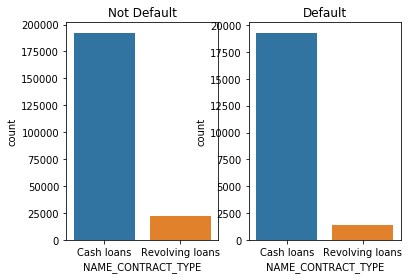

In [52]:
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data   = TARGET_0)
plt.title('Not Default')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data   = TARGET_1)
plt.title('Default')
plt.show()

In [53]:
## Count of Cash loans is high in both Defaulted as well as not Not defaulted

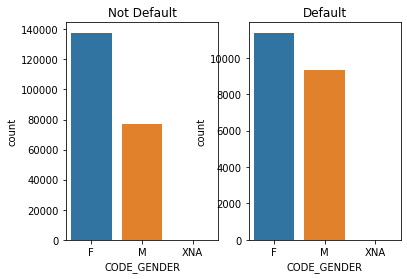

In [54]:
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data   = TARGET_0)
plt.title('Not Default')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data   = TARGET_1)
plt.title('Default')
plt.show()

In [55]:
## Number of Females are high as compared to no. of males who takes loan.

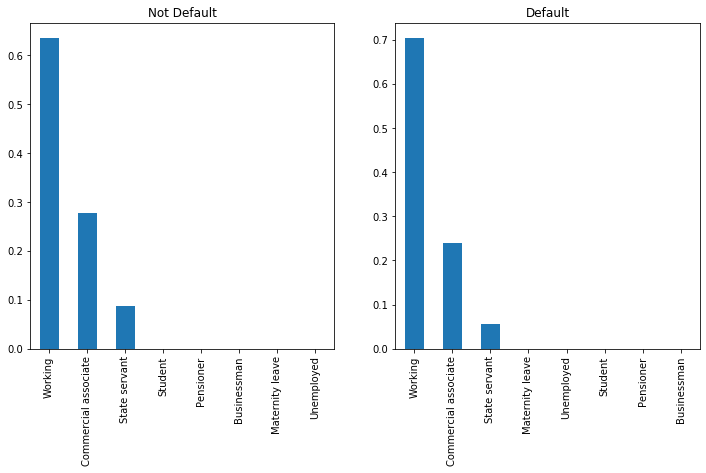

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
TARGET_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Not Default')

plt.subplot(1,2,2)
TARGET_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Default')
plt.show()

In [57]:
## Working class people are high in both the cases i.e Default as well as not default

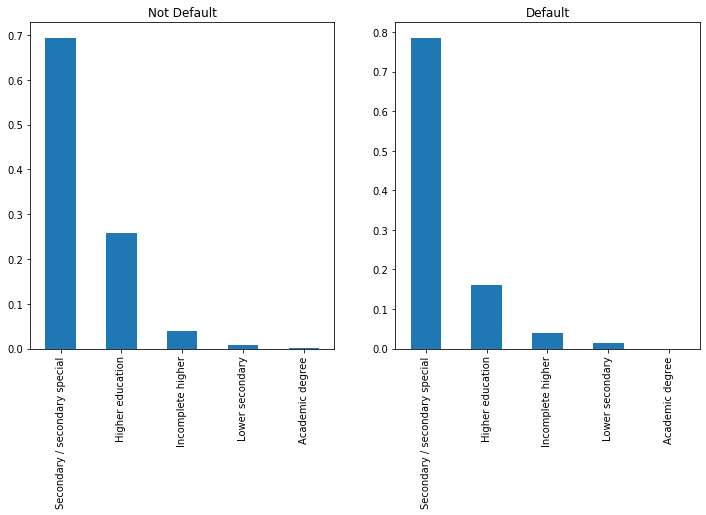

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
TARGET_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Not Default')

plt.subplot(1,2,2)
TARGET_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Default')
plt.show()

In [59]:
## Much educated people takes more loan.

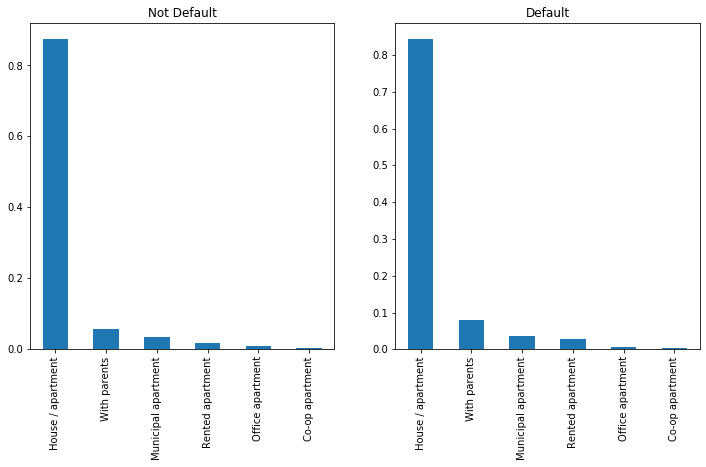

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
TARGET_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Not Default')

plt.subplot(1,2,2)
TARGET_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Default')
plt.show()

In [61]:
## People who lives in there own House or apartment takes more loan.

### ---Perform univariate for numerical variables for both 0 and 1. 
### ---Compared the target variable across categories of continuous variables


### 2) Continuous Univariate

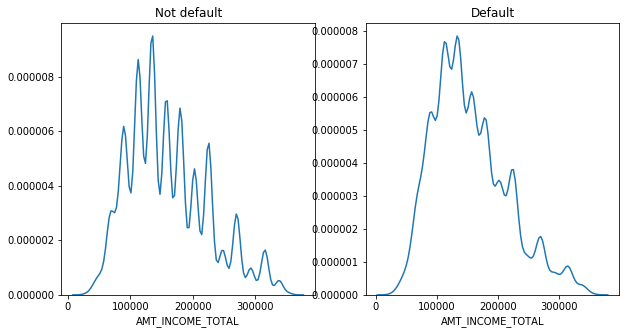

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(TARGET_0['AMT_INCOME_TOTAL'].dropna(), hist=False)
plt.title('Not default')

plt.subplot(1,2,2)
sns.distplot(TARGET_1['AMT_INCOME_TOTAL'].dropna(), hist=False)
plt.title('Default')
plt.show()

In [63]:
## Income of defaulted people lies mostly in th range of 100000 to 150000 

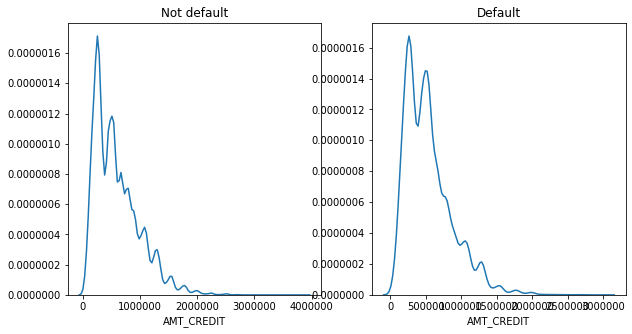

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(TARGET_0['AMT_CREDIT'].dropna(), hist=False)
plt.title('Not default')

plt.subplot(1,2,2)
sns.distplot(TARGET_1['AMT_CREDIT'].dropna(), hist=False)
plt.title('Default')
plt.show()

In [65]:
## Credit amount of the loan in Default case lies mostly in the range under 1000000.

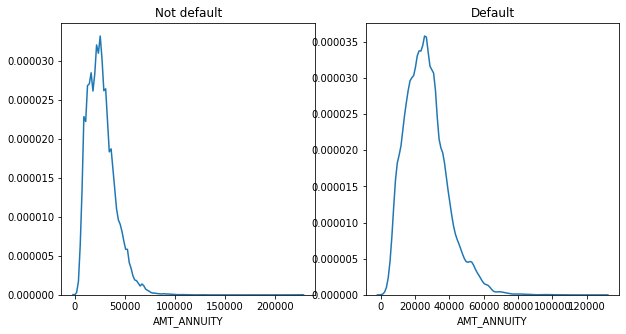

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(TARGET_0['AMT_ANNUITY'].dropna(), hist=False)
plt.title('Not default')

plt.subplot(1,2,2)
sns.distplot(TARGET_1['AMT_ANNUITY'].dropna(), hist=False)
plt.title('Default')
plt.show()

In [67]:
## Loan annuity lies mostly in the range under 20000 to 40000 in Defaulted case.

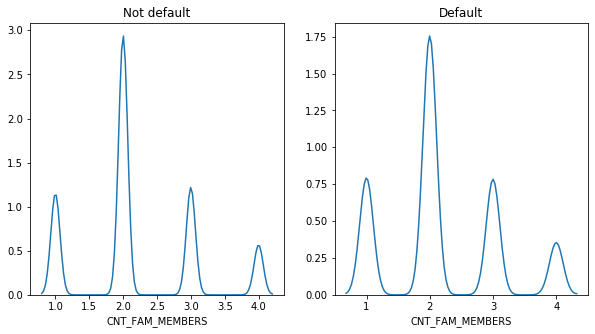

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(TARGET_0['CNT_FAM_MEMBERS'].dropna(), hist=False)
plt.title('Not default')

plt.subplot(1,2,2)
sns.distplot(TARGET_1['CNT_FAM_MEMBERS'].dropna(), hist=False)
plt.title('Default')
plt.show()

In [69]:
## Number of Family members are mostly 2 in the case of Default

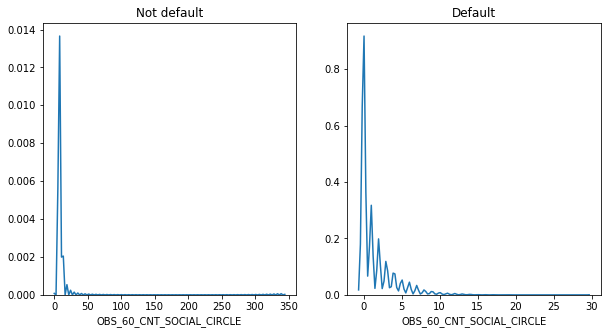

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(TARGET_0['OBS_60_CNT_SOCIAL_CIRCLE'].dropna(), hist = False)
plt.title('Not default')

plt.subplot(1,2,2)
sns.distplot(TARGET_1['OBS_60_CNT_SOCIAL_CIRCLE'].dropna(), hist=False)
plt.title('Default')
plt.show()

### ---Perform bivariate analysis for both 0 and 1.
### 1) Continuous-Continuous-Bivariate

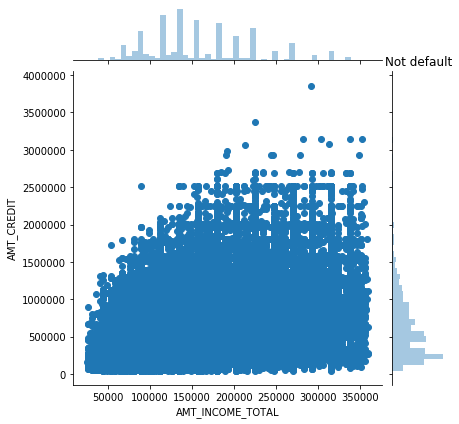

In [71]:
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', TARGET_0)
plt.title('Not default')
plt.show()

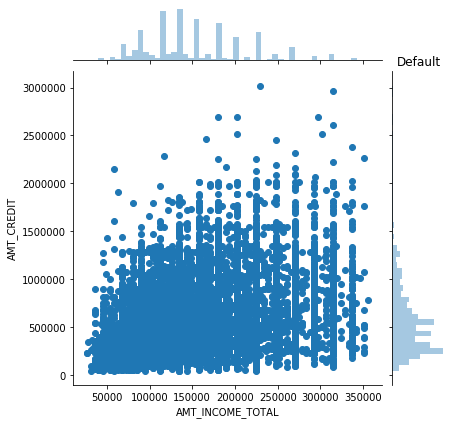

In [72]:
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', TARGET_1)
plt.title('Default')
plt.show()

In [73]:
## Concentration shows that most default cases are found under the range of AMT_CREDIT=upto 1000000 and AMT_INCOME_TOTAL= 75000 to 200000

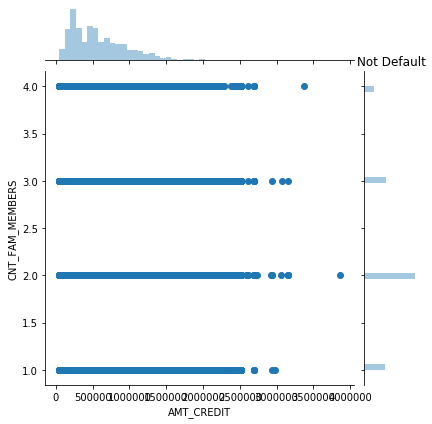

In [74]:
sns.jointplot('AMT_CREDIT', 'CNT_FAM_MEMBERS', TARGET_0)
plt.title('Not Default')
plt.show()

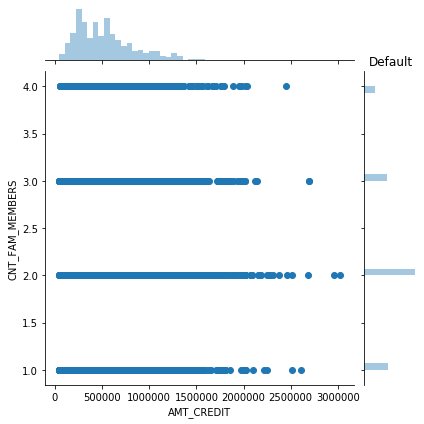

In [75]:
sns.jointplot('AMT_CREDIT', 'CNT_FAM_MEMBERS', TARGET_1)
plt.title('Default')
plt.show()

In [76]:
## most number of default cases are found in person who has 2 family members and Credited amount upto the range of 0 to 2000000

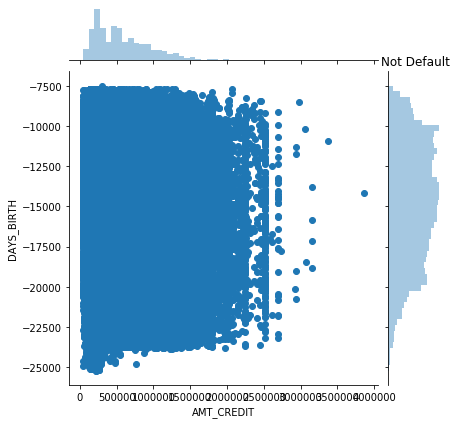

In [77]:
sns.jointplot('AMT_CREDIT', 'DAYS_BIRTH', TARGET_0)
plt.title('Not Default')
plt.show()

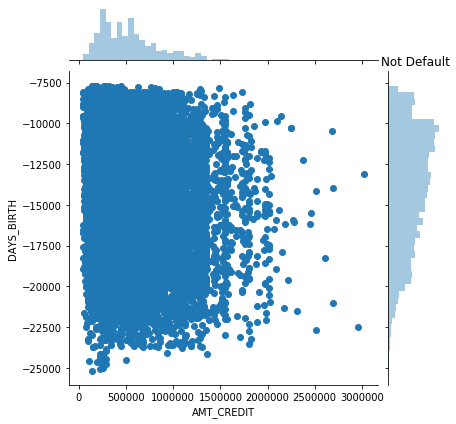

In [78]:
sns.jointplot('AMT_CREDIT', 'DAYS_BIRTH', TARGET_1)
plt.title('Not Default')
plt.show()

In [79]:
## Most number of defaulted cases are concentrated where AMT_CREDIT<500000 and DAYS_BIRTH<12500.

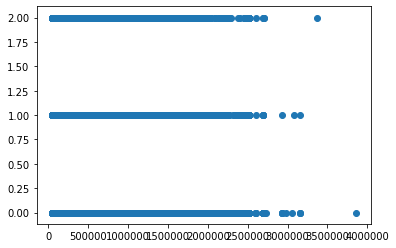

In [80]:
plt.scatter(TARGET_0['AMT_CREDIT'], TARGET_0['CNT_CHILDREN'])
plt.show()

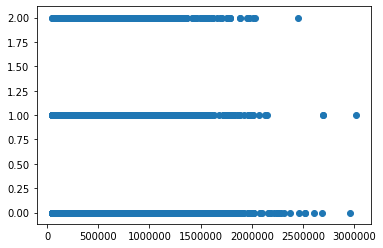

In [81]:
plt.scatter(TARGET_1['AMT_CREDIT'], TARGET_1['CNT_CHILDREN'])
plt.show()

In [82]:
## Most number of defaulted cases are found where client has 0 children.

### 2) Categorical-Categorical Bivariate

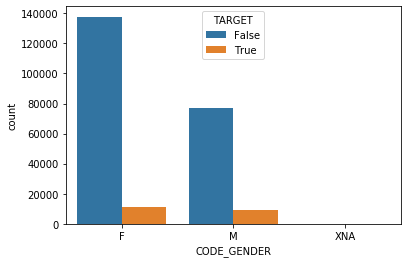

In [83]:
sns.countplot(subset.CODE_GENDER, hue=subset['TARGET'])  
plt.show()

In [84]:
## Females are more defaulted as compared to males.

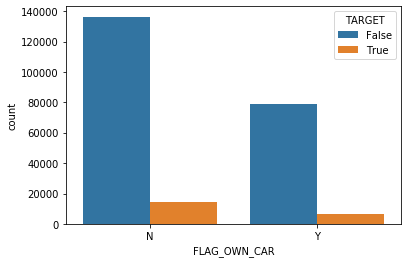

In [85]:
sns.countplot(subset.FLAG_OWN_CAR, hue=subset['TARGET'])
plt.show()

In [86]:
## People who don't have cars are more defaulted as compared to one who has the car.

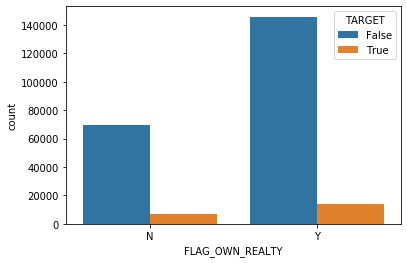

In [87]:
sns.countplot(subset.FLAG_OWN_REALTY, hue=subset['TARGET'])
plt.show()

In [88]:
## People who have there own House or Flat are found to be more defaulted as compared to the one who has not.

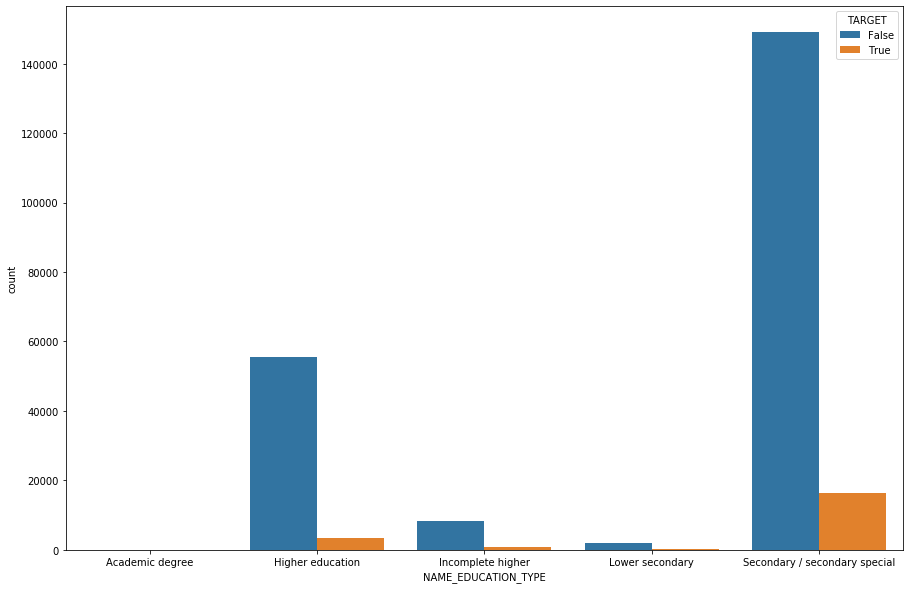

In [89]:
plt.figure(figsize=(15, 10))
sns.countplot(subset.NAME_EDUCATION_TYPE, hue=subset['TARGET'])
plt.show()

In [90]:
## Secondary/secondary special class educate people are more defaulted followed by Higher education class.

### 3) Continuous- Categorical Bivariate

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

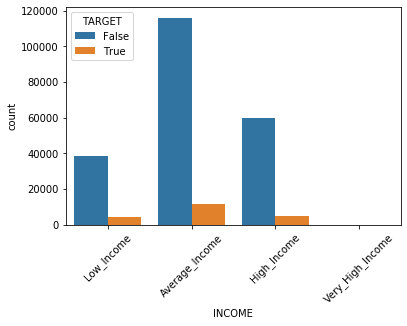

In [91]:
# 1)INCOME
sns.countplot(x = 'INCOME', hue = 'TARGET', data = subset)
plt.xticks(rotation = 45)

In [92]:
## People with average income between 100000 to 200000 has higher default rate.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

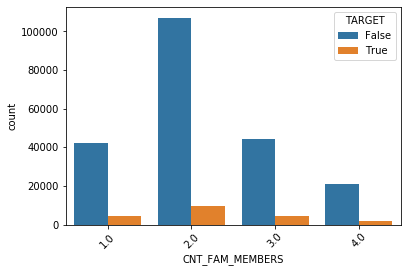

In [93]:
# 2)CNT_FAM_MEMBERS 
sns.countplot(x = 'CNT_FAM_MEMBERS', hue = 'TARGET', data = subset)
plt.xticks(rotation = 45)

In [94]:
## People with 2 family members have high default rates.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

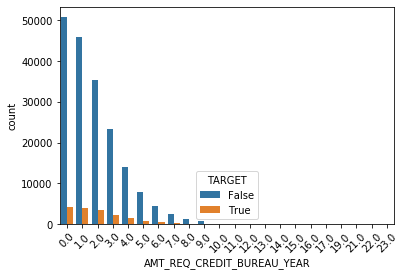

In [95]:
# 3) AMT_REQ_CREDIT_BUREAU_YEAR
sns.countplot(x = 'AMT_REQ_CREDIT_BUREAU_YEAR', hue = 'TARGET', data = subset)
plt.xticks(rotation = 45)

In [96]:
## People with number of enquiries to Credit Bureau one day year between range 0 to 2 has high default rate.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

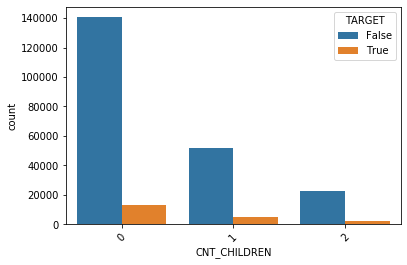

In [292]:
# 4) CNT_CHILDREN
sns.countplot(x = 'CNT_CHILDREN', hue = 'TARGET', data = subset)
plt.xticks(rotation = 45)

In [ ]:
## Client who don't have childeren are among high defaulters.

### Read “Previous Application” data. 

In [324]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000000000063664629124104976654052734375,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.18283180324152784046454200961306924000382423...,0.86733615221987314658491641239379532635211944...,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615000000001600710675120353698730468750000,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735000000000582076609134674072265625000000,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.334999999999126885086297988891601562500000,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395000000000436557456851005554199218750000,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
### routine check
print(previous_application.shape)
print('\n', previous_application.columns)

(1670214, 37)

 Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')


### Remove column with high missing percentage, say >50%

In [326]:
#Null values, percentage and data type
def missing_values_table(previous_application):     
    # Sum of null values
    mis_val = previous_application.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * previous_application.isnull().sum() / len(previous_application)
    
    # Data type of objects
    data_type = previous_application.dtypes
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent,data_type], axis=1)   
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'Data_Type'})
    return mis_val_table_ren_columns
print(missing_values_table(previous_application))

                             Missing Values                                  % of Total Values Data_Type
SK_ID_PREV                                0  0.00000000000000000000000000000000000000000000...     int64
SK_ID_CURR                                0  0.00000000000000000000000000000000000000000000...     int64
NAME_CONTRACT_TYPE                        0  0.00000000000000000000000000000000000000000000...    object
AMT_ANNUITY                          372235  22.2866650620818660399891086854040622711181640...   float64
AMT_APPLICATION                           0  0.00000000000000000000000000000000000000000000...   float64
AMT_CREDIT                                1  0.00005987256722791211367880326310597638439503...   float64
AMT_DOWN_PAYMENT                     895844  53.6364801157216959381912602111697196960449218...   float64
AMT_GOODS_PRICE                      385515  23.0817727548685382998883142136037349700927734...   float64
WEEKDAY_APPR_PROCESS_START                0  0.00000000

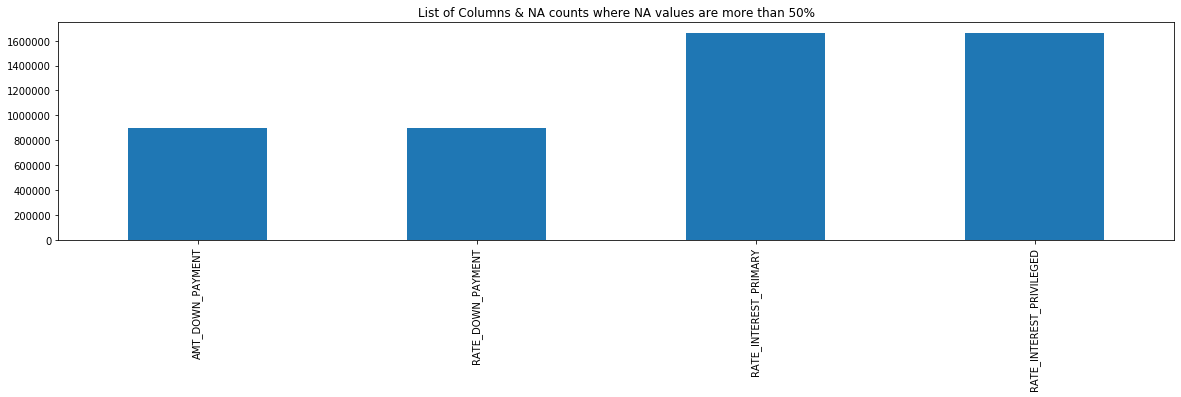

In [327]:
# for calculating with columns with high missing percentage (greater than and equal to 50 percent).
NA_col = previous_application.isnull().sum()
NA_col = NA_col[NA_col.values >(0.50*len(previous_application))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

In [328]:
# for removing the columns with high missing percentage (greater than and equal to 50 percent).
colnames = (previous_application.isnull().sum()/len(previous_application))
colnames = list(colnames[colnames.values>=0.45].index)
previous_application.drop(labels = colnames,axis =1,inplace=True)        
print("Number of Columns dropped\t: ",len(colnames))
print(colnames)

Number of Columns dropped	:  5
['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE']


In [329]:
previous_application.shape

(1670214, 32)

### merging the file 

In [330]:
application_prev_data = subset.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [331]:
application_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,OBS_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880099999999999826894026000445592217147350...,-9461,-637,True,False,False,Laborers,1.0,2,-1134.0,True,2.0,Business Entity Type 3,0.0,0.0,0.0,1.0,High_Income,1038818,Consumer loans,9251.7749999999996362021192908287048339843750,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.00354099999999999900945901742943533463403582...,-16765,-1188,True,False,False,Core staff,2.0,1,-828.0,True,1.0,School,0.0,0.0,0.0,0.0,High_Income,1810518,Cash loans,98356.9949999999953433871269226074218750000000,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.00354099999999999900945901742943533463403582...,-16765,-1188,True,False,False,Core staff,2.0,1,-828.0,True,1.0,School,0.0,0.0,0.0,0.0,High_Income,2636178,Consumer loans,64567.6650000000008731149137020111083984375000,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.00354099999999999900945901742943533463403582...,-16765,-1188,True,False,False,Core staff,2.0,1,-828.0,True,1.0,School,0.0,0.0,0.0,0.0,High_Income,2396755,Consumer loans,6737.3100000000004001776687800884246826171875,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003199999999999925126559219279442913830280...,-19046,-225,True,False,False,Laborers,1.0,2,-815.0,False,0.0,Government,0.0,0.0,0.0,0.0,Low_Income,1564014,Consumer loans,5357.2500000000000000000000000000000000000000,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,

In [332]:
application_prev_data.shape

(1064990, 65)

### Corelation

In [334]:
corr = (application_prev_data[['NAME_CONTRACT_TYPE_x','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
                                'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','CNT_FAM_MEMBERS']].corr())

In [335]:
(corr.style.background_gradient(cmap='coolwarm'))

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS
CNT_CHILDREN,1,-0.0280465564899797133169290219711911049671471118927,0.077219732596917320388563155120209557935595512390137,0.87302455428504111001331011721049435436725616455078
AMT_INCOME_TOTAL,-0.0280465564899797133169290219711911049671471118927,1,-0.035243832090796400891008488542865961790084838867188,-0.023447694111826233864803725737147033214569091796875
DAYS_EMPLOYED,0.077219732596917320388563155120209557935595512390137,-0.035243832090796400891008488542865961790084838867188,1,0.047141099182387874444444264554476831108331680297852
CNT_FAM_MEMBERS,0.87302455428504111001331011721049435436725616455078,-0.023447694111826233864803725737147033214569091796875,0.047141099182387874444444264554476831108331680297852,1


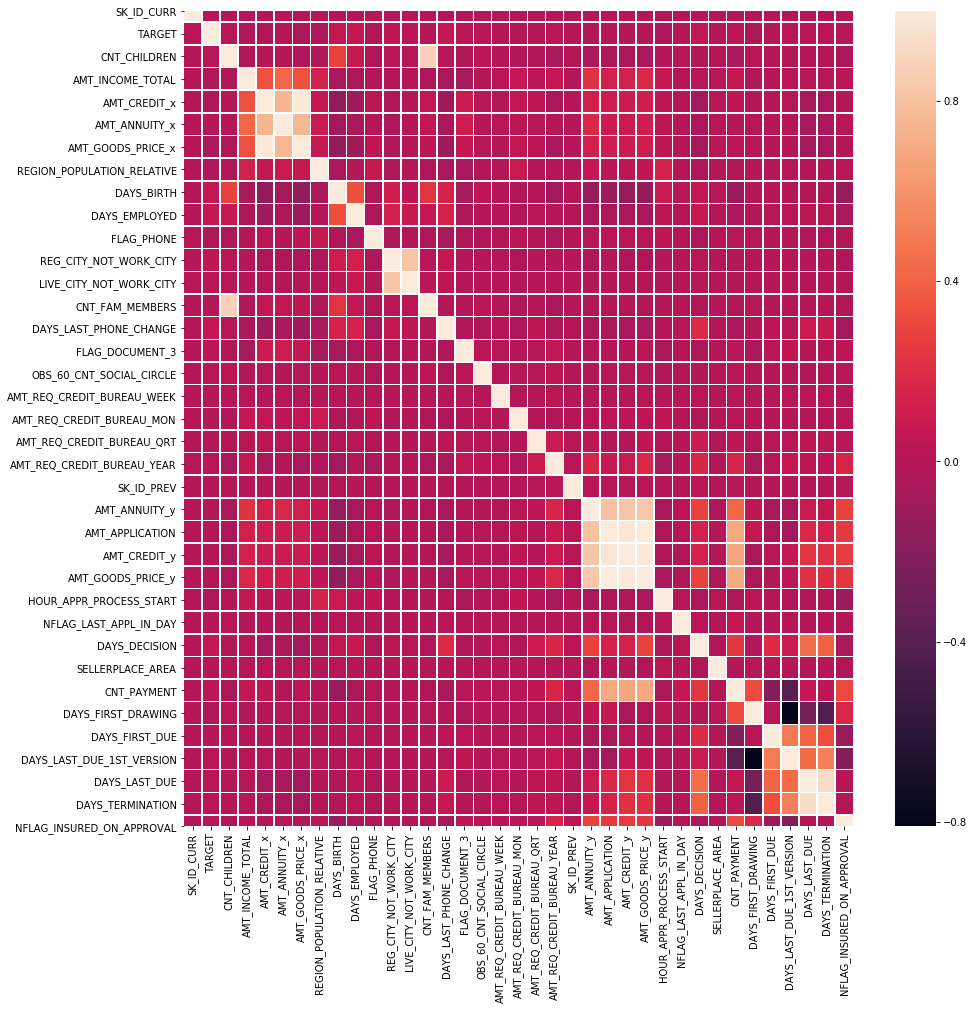

In [343]:
plt.figure(figsize=(15, 15))
sns.heatmap(application_prev_data.corr(), linewidth=0.5)

In [ ]:
## If we analyse the heat map then we will find that 'DAYS_LAST_DUE_1st_VERSION' AND 'DAYS_FIRST_DRAWING' are highly coorelated.

### - Univariate and Bivariate analysis

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

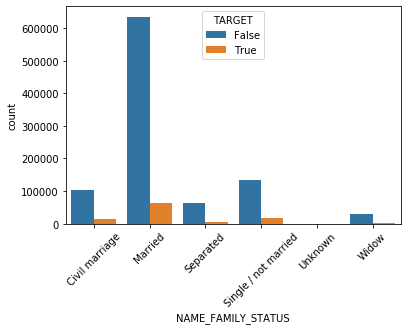

In [350]:
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## Married person takes more loan and have high defalut rate as compared to others. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

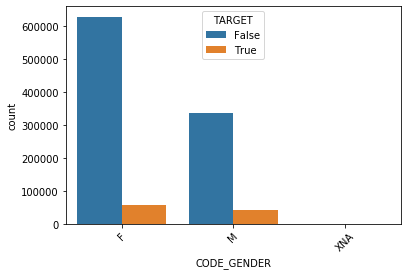

In [348]:
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## Again Defaulted rate of Women are high as compared to males.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

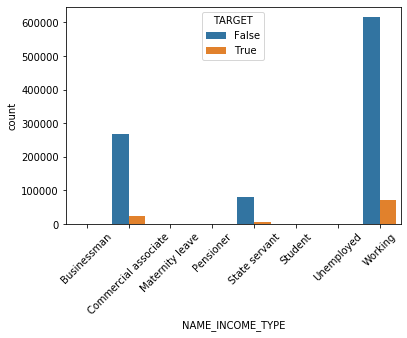

In [351]:
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## Plot is clearly showing that people in working class takes more loan and have high default rates, but it is still unclear as there can be many subcategories under the Working class also which we don't have data about.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

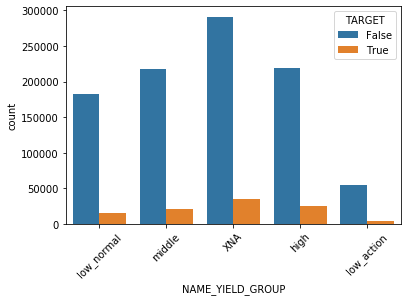

In [352]:
sns.countplot(x = 'NAME_YIELD_GROUP', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## we con consider XNA as null.Interest rate into High yield group are more default.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

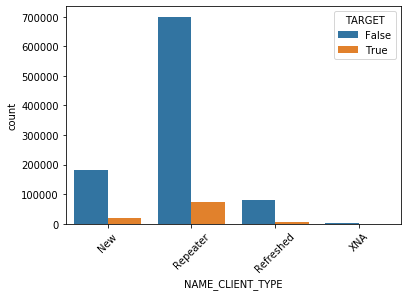

In [353]:
sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## Client who are repeated have more number of Default rates.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

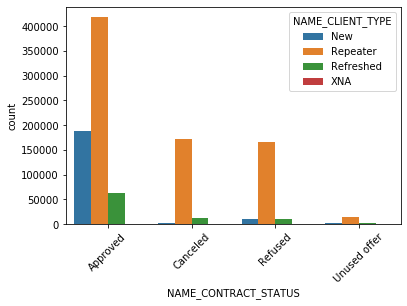

In [355]:
sns.countplot(x = 'NAME_CONTRACT_STATUS', hue = 'NAME_CLIENT_TYPE', data = application_prev_data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

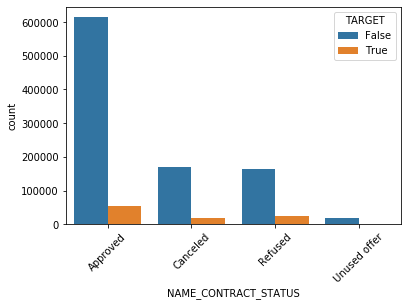

In [356]:
sns.countplot(x = 'NAME_CONTRACT_STATUS', hue = 'TARGET', data = application_prev_data)
plt.xticks(rotation = 45)

In [ ]:
## Most numbers of loans are Approved for repeated clients and Approved loans have high default rates. 

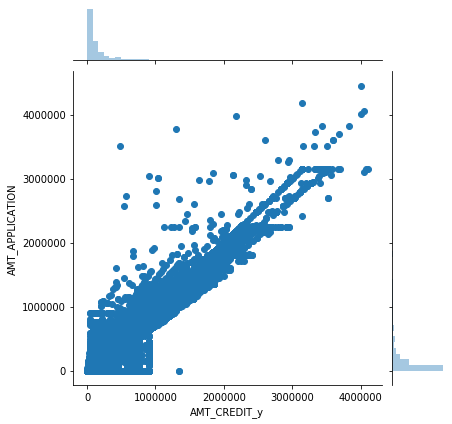

In [362]:
sns.jointplot('AMT_CREDIT_y', 'AMT_APPLICATION', application_prev_data)
plt.show()

In [ ]:
## Mostly people who asks for loan under the range of 1000000 are granted the loan. Once the AMT_APPLICATION starts increasing beyond 100000 there may occur some variation in AMT_CREDIT.

 We have been given two files.
 
 1) Contains all the information of the client at the time of application. It contains datas about whether a client has payment difficulties.(If Target-1 then Defaulter, If Target-0, then Not a Defaulter.)
 
 2) Contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
 
 Now, we need to analyse the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
 
 We have analysed both the files independently and together throughly.
 
 As the files we got had lots of missing values and there were also lots of columns that doesn't makes sense. We have droped those columns which have very high missing values, and columns that doesn't makes sense for the analysis. We also changed Datatypes of the columns where ever it was required.
 
 While cleaning the datas we handled the outliers and missing values, standardize few columns and we also did Bucketing of few columns.
 
 So, finally after the data cleaning, handling missing and dropping few columns we are left with a dataset which is a subset of the original dataset and which has only those columns that makes sense, which will be very helpful for analysis.
 
  Now, we started the analysis first with the current application dataset.
 
 ************************************These are the insights we got after the analysis****************************************
 
 1) The ratio of Default('TARGET-1') vs Not Default('TARGET-0') is highly imbalanced. It has approx 92% non defaulters and 8% defaulters.
 
 
 So, After this we divided the data into two more data sets. One that has all the values of 'TARGET-1' other that has all the values of 'TARGET-0', it was helpful for analysis.
 
 We did the Univariate and Bivariate analysis of few Numerical and Ctegorical datatypes columns.
 
 2) Most loans are Cash loans as compared to Revolving loans.
 
 
 3) Number of Females are high as compared to number of males who takes loan and who are defaulter.
 
 ![image.png](attachment:image.png)
 
 4) Working class people are high in both the cases i.e Default as well as not default. But it is still unclear as there can be various sub categories inside 'Working class' also.
 
 
 5) Much educated people(Secondary class) takes more loan followed by Higher education class and have high default rates. Educated people might be taking more loans as the might be needed to by flats/cars/go for vacation once they get the job.
 
 6) People who lives in there own House or apartment takes more loan and have high default rates. People who has there own house it might be possible that they are free of other responsibilities like to buy house and takes more loans freely.
 
 7) Income of defaulted people lies mostly in th range of 100000 to 200000. People under this category are capable of paying the EMI, and people below this category may not be capable enough to repay so they do not take loan. People whose income is greater than 200000, it might be possible that they do not need the loan.
 
 8) Credited amount of the loan in Default case lies mostly in the range under 1000000.
 
 9) Loan annuity lies mostly in the range under 20000 to 40000 in Defaulted case.
 
 10) Number of Family members are mostly 2 in the case of Default loans. Client who has small family might be free of any other responsibility, so they take more loans. 
 
 11) Concentration shows that most default cases are found under the range of AMT_CREDIT=upto 1000000 and AMT_INCOME_TOTAL= 75000 to 200000
 
 12) Most number of default cases are found in person who has 2 family members and Credited amount upto the range of 0 to 2000000.
 
 13) Most number of defaulted cases are concentrated where AMT_CREDIT<500000 and DAYS_BIRTH<12500. Middle age people have many new things in mind and maybe many new business ideas to do. That's why they take more loans.
 
 14) Most number of defaulted cases are found where client has 0 children. These clients are free of any reponsibility, So, they think of taking more loans
 
 15) People who don't have cars are more defaulted as compared to one who has the car. People who have cars, it maybe the case that they are capable enough to pay the loans.
 
 16) People with number of enquiries to Credit Bureau one day year between range 0 to 2 has high default rate.
 
After analyzing the current application data, we imported the previous application file and did normal steps that needed to be done like cleaning of datas and removing columns with missing values more than 50%.

Then we merged this file with the 'subset' that is the combination of both TARGET-0 and TARGET-1, did corelation and performed some more Univariate and Bivariate analysis.

 17) We found that 'DAYS_LAST_DUE_1ST_VERSION' has high corelation with 'DAYS_FIRST_DRAWING'.
 
 18) Married person takes more loan and have high defalut rate as compared to others.
 
 19) Again Defaulted rate of Women are high as compared to males.
 
 20) Client with Interest rate into High yield group are more default followed by Middle yield.
 
 21) Most numbers of loans are Approved for repeated clients and Approved loans have high default rates.
 
 So, our final conclusion is that amount of Cash Loan is more as compared to Revolving loan which is mostly taken by Females.
 Client whose age is around 35years takes more loan compared to others, and most client who takes loans and have high default rates have 2 members in the family and do not have children, which makes them free of other responsibility, so, they take much more loans. These people also have there own house, they do not live in any rented house, this is also the point taht makes them free. Most people who are around the age of 35 must be thinking of some Business ideas, people around this age also plan for vacations or tourism for which they can take loans and pay in installment. It is also observed that people who takes loan have income between 100000 to 200000. If income of people is less that 100000 they hesitate to take high amount loans thinking that they might be not capable enough to repay timely, and people whose income is more than 200000 might be capable of repaying the loans timely. It is also found that loans which has low interest rates do not get defaulted but the loans which has high interest rates.
 

So, Bank must look after the client mostly females who who are Married who takes loan with high interest rates followed by males, with income between 100000-200000, owns house and have less family members.